<a href="https://colab.research.google.com/github/Megancodes2017/Megancodes2017/blob/main/Ranked1B_Defense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.5/416.5 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 47.8 MB/s eta 0:00:00


In [ ]:
from pybaseball import fielding_stats

In [ ]:
data = fielding_stats(start_season=2022, end_season=2025, qual=10, ind=1)
first_base = data[data['Pos'] == '1B']

In [ ]:
from sklearn.preprocessing import StandardScaler

metrics = ['Name', 'Team', 'Season', 'DRS', 'UZR/150', 'OAA', 'rPM']
df = first_base[metrics].fillna(0)

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df[['DRS', 'UZR/150', 'OAA']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
df['Def_Score'] = pca.fit_transform(X_scaled)

In [ ]:
ranked = df.sort_values('Def_Score', ascending=False)
print(ranked.head(10))

                  Name   Team  Season  DRS  UZR/150   OAA   rPM  Def_Score
1664  Christian Walker    ARI    2022   17      5.0  14.0  17.0   7.970452
942     Carlos Santana    MIN    2024    8      2.3  14.0   6.0   5.692811
4240        Matt Olson    ATL    2025   15      0.0   7.0  12.0   5.634458
2578  Christian Walker    ARI    2023    9      2.6  12.0   8.0   5.440793
849   Christian Walker    ARI    2024    7      2.9  13.0   6.0   5.199884
4572        Matt Olson    ATL    2024   13      0.1   4.0   9.0   4.380550
3544    Carlos Santana    CLE    2025    9      0.0   6.0   8.0   3.888864
3471     Spencer Steer    CIN    2025    8      0.0   6.0   7.0   3.640023
4472    Carlos Santana  - - -    2023   11     -1.2   3.0  11.0   3.611993
3488         Ty France  - - -    2025    6      0.0   7.0   4.0   3.394885


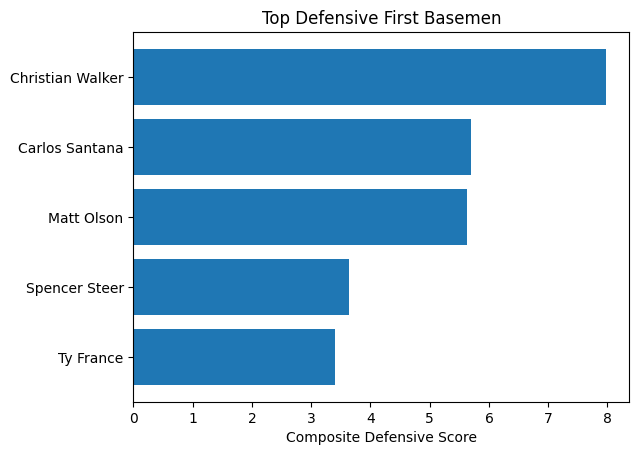

In [ ]:
import matplotlib.pyplot as plt

top10 = ranked.head(10)
plt.barh(top10['Name'], top10['Def_Score'])
plt.xlabel('Composite Defensive Score')
plt.title('Top Defensive First Basemen')
plt.gca().invert_yaxis()
plt.show()